In [3]:
import pandas as pd
import seaborn as sns

Seaborn es una biblioteca de visualización de datos en Python que se basa en Matplotlib y proporciona una interfaz de alto nivel para crear gráficos atractivos y estadísticas informativas. Aunque no está directamente integrada con pandas, Seaborn es comúnmente utilizada junto con pandas para visualizar conjuntos de datos almacenados en DataFrames.

In [2]:
# Mostrar la version que tenemos instalada de seaborn
!pip show seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


In [5]:
tarjetas = pd.read_csv('Data/tarjetas.csv', sep=',')
tarjetas.head(10)

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0
5,30110,Si,2.Universidad,Soltero/a,23,114.4180,114.4180,0
6,42154,Si,1.Colegio,Casado/a,28,4244.3056,1002.3619,0
7,60220,Si,1.Colegio,Soltero/a,34,2946.8657,694.3366,0
8,78286,Si,3.Pos-graduación,Soltero/a,51,6524.8370,6524.8370,0
9,189693,Si,2.Universidad,Soltero/a,41,1957.1500,301.1000,0


In [7]:
tarjetas.shape

(1500, 8)

<font color= yellow> Graficar con seaborn

Analisis 1

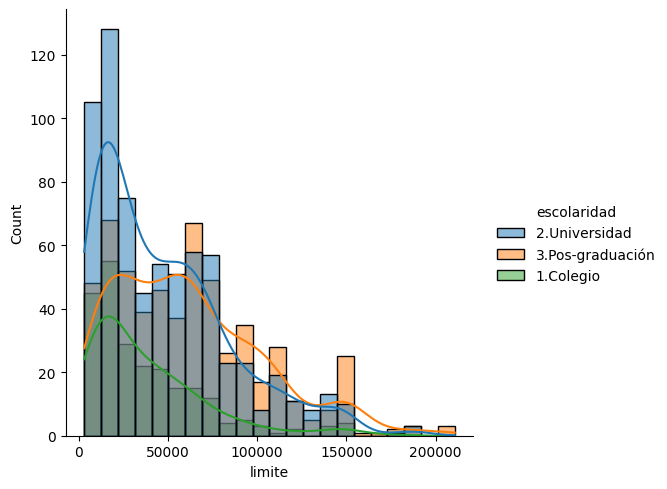

In [14]:
sns.displot(data=tarjetas, x='limite', hue='escolaridad', kde=True);

Analisis 2

Crear una columna con el porcentaje que una persona uso (valor factura) del total de limite que tiene disponible

In [15]:
# Crear columna que indique el porcentaje que uso segun el limite disponible
tarjetas['iu'] = tarjetas['valor_factura'] / tarjetas['limite']
tarjetas.head(10)

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046
5,30110,Si,2.Universidad,Soltero/a,23,114.4180,114.4180,0,0.003800
6,42154,Si,1.Colegio,Casado/a,28,4244.3056,1002.3619,0,0.100686
7,60220,Si,1.Colegio,Soltero/a,34,2946.8657,694.3366,0,0.048935
8,78286,Si,3.Pos-graduación,Soltero/a,51,6524.8370,6524.8370,0,0.083346
9,189693,Si,2.Universidad,Soltero/a,41,1957.1500,301.1000,0,0.010317


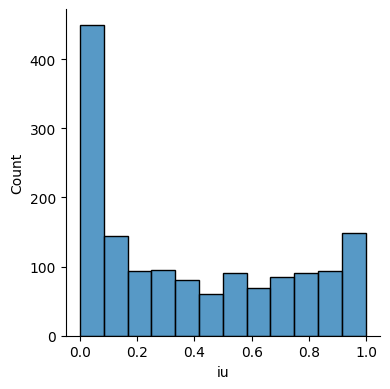

In [18]:
sns.displot(data=tarjetas, x='iu', height=4) 

Hay un publico significativo que usa poco dinero del limite que tiene dispobible

<font color= yellow> Creando graficos son estilos y colores

In [21]:
# Darle un fondo a nuestros graficos
sns.set_style('darkgrid')

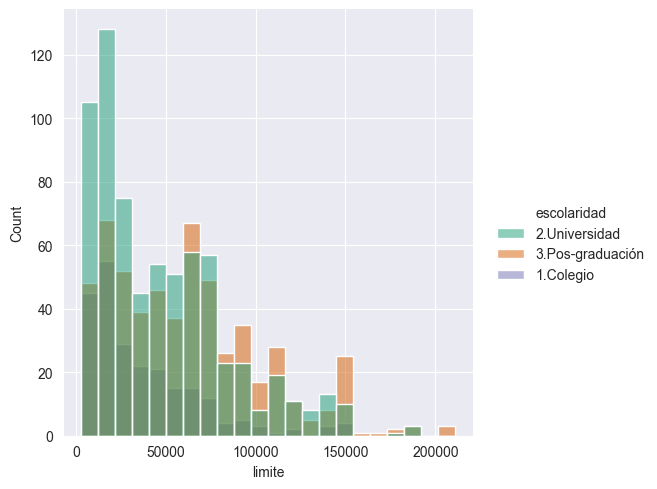

In [56]:
sns.displot(data=tarjetas, x='limite', hue='escolaridad', palette='Dark2');

<font color= yellow> Analisis de variables categoricas

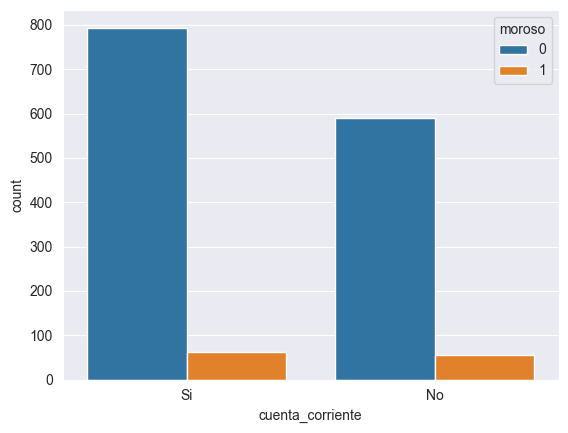

In [70]:
# Observar si las personas que tienen cuenta corriente son mas morosas
sns.countplot(data=tarjetas, x='cuenta_corriente', hue='moroso');

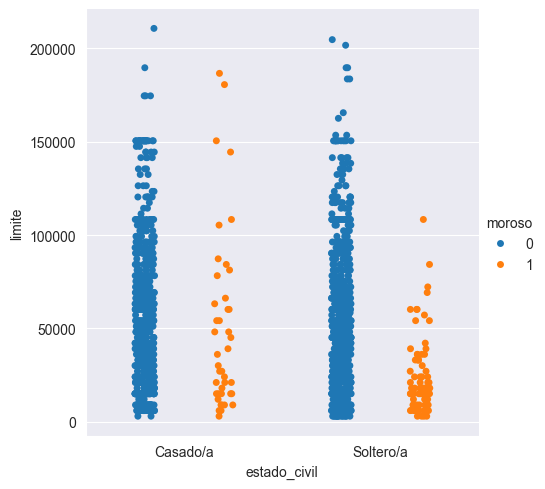

In [76]:
# Observar si las personas que son casadas tienen mas limites que las solteras y cuantos son morosos
sns.catplot(data=tarjetas, x='estado_civil', y='limite', hue='moroso', dodge=True)

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='escolaridad', ylabel='iu'>

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


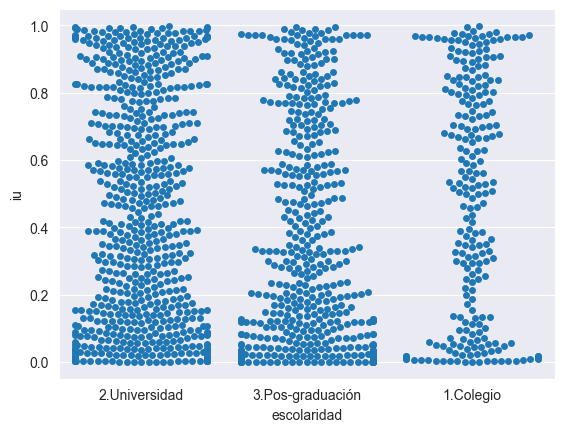

In [77]:
# Comparar el nivel de escolaridad con el porcentaje 'iu'
sns.swarmplot(data=tarjetas, x='escolaridad', y='iu')

<Axes: xlabel='escolaridad', ylabel='iu'>

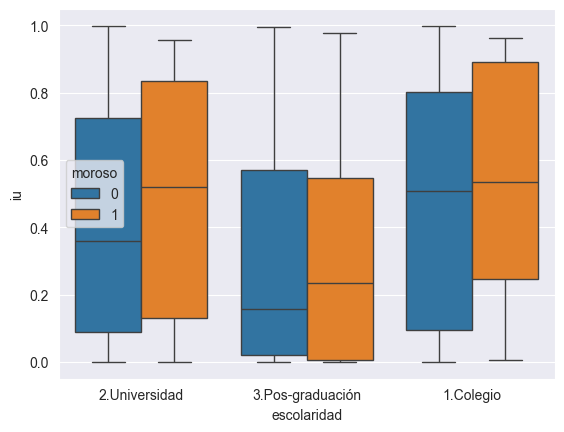

In [80]:
sns.boxplot(data=tarjetas, x='escolaridad', y='iu', hue='moroso')

<Axes: xlabel='escolaridad', ylabel='iu'>

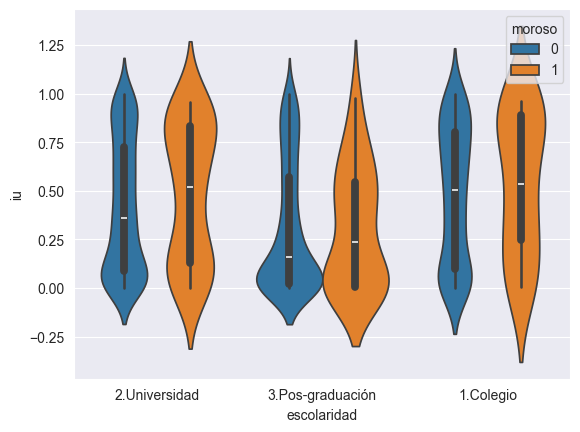

In [81]:
sns.violinplot(data=tarjetas, x='escolaridad', y='iu', hue='moroso')

In [82]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046


In [83]:
tarjetas['edad'].unique()

array([24, 26, 34, 37, 29, 23, 28, 51, 41, 30, 49, 39, 40, 47, 27, 33, 32,
       54, 58, 22, 31, 25, 42, 45, 57, 56, 44, 35, 53, 43, 38, 63, 36, 52,
       46, 50, 48, 75, 55, 73, 59, 21, 60, 67, 61, 62, 70, 72],
      dtype=int64)

Crear una nueva columnas para agrupar las personas por rango de edad

In [84]:
bins = [20, 30, 40, 50, 100]
nombres = ['20-30', '30-40', '40-50', '50+']
tarjetas['rango_edad'] = pd.cut(tarjetas['edad'], bins, labels=nombres)

In [86]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu,rango_edad
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100,20-30
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375,20-30
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856,30-40
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660,30-40
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046,20-30


<Axes: xlabel='rango_edad', ylabel='limite'>

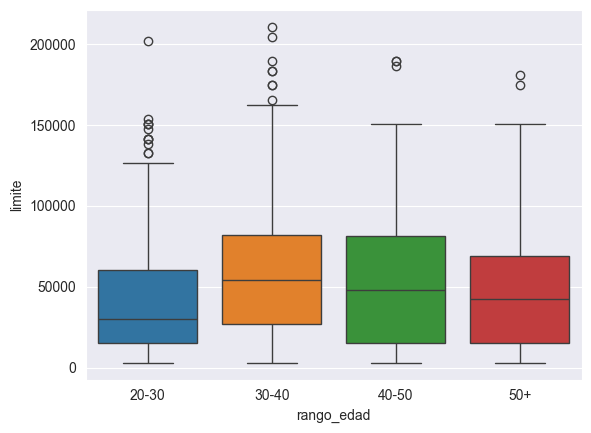

In [91]:
sns.boxplot(data=tarjetas, x='rango_edad', y='limite', hue='rango_edad')